In [1]:
# Пример решения с использованием статистического подхода - подсчет 
# совстречаемостей.

import pandas as pd
import numpy as np
import gc

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [2]:
hist_data = pd.read_csv('hist_data.csv')

In [3]:
hist_data

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods,weight
0,95203091,98506637863,2021-07-01 00:03:44,202808329,1.000,79.990,False,11.14
1,95203091,98506637863,2021-07-01 00:03:44,202953905,1.072,44.945,True,11.14
2,95203091,98506637863,2021-07-01 00:03:44,203566452,1.000,69.990,False,11.14
3,95203091,98506637863,2021-07-01 00:03:44,202820143,1.972,41.295,True,11.14
4,95203091,98506637863,2021-07-01 00:03:44,204400422,1.000,269.990,False,11.14
...,...,...,...,...,...,...,...,...
4529884,95619205,4620221347,2021-09-07 18:48:29,204351817,1.000,99.990,False,9.84
4529885,95619205,4620221347,2021-09-07 18:48:29,203523604,1.000,62.190,False,9.84
4529886,95619205,4620221347,2021-09-07 18:48:29,203566357,2.000,39.890,False,9.84
4529887,95619205,4620221347,2021-09-07 18:48:29,203566418,1.000,62.190,False,9.84


In [4]:
hist_data['created'] = pd.to_datetime(hist_data['created'])

hist_data['created_month'] = hist_data['created'].apply(lambda x: x.month)
hist_data['created_day'] = hist_data['created'].apply(lambda x: x.day)
hist_data['created_dayofweek'] = hist_data['created'].apply(lambda x: x.dayofweek)
hist_data['created_hour'] = hist_data['created'].apply(lambda x: x.hour)
hist_data['created_minute'] = hist_data['created'].apply(lambda x: x.minute)
hist_data['created_weekends'] = hist_data['created_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

hist_data['flag_weight_goods'] = 1 * (hist_data.flag_weight_goods.values == True)

In [5]:
hist_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,4529879,4529880,4529881,4529882,4529883,4529884,4529885,4529886,4529887,4529888
buyer_id,95203091,95203091,95203091,95203091,95203091,95203091,95203091,95203091,95203091,95203091,...,95619205,95619205,95619205,95619205,95619205,95619205,95619205,95619205,95619205,95619205
pav_order_id,98506637863,98506637863,98506637863,98506637863,98506637863,98506637863,98506637863,98506637863,98506637863,98506637863,...,4620221347,4620221347,4620221347,4620221347,4620221347,4620221347,4620221347,4620221347,4620221347,4620221347
created,2021-07-01 00:03:44,2021-07-01 00:03:44,2021-07-01 00:03:44,2021-07-01 00:03:44,2021-07-01 00:03:44,2021-07-01 00:03:44,2021-07-01 00:03:44,2021-07-01 00:03:44,2021-07-01 00:03:44,2021-07-01 00:03:44,...,2021-09-07 18:48:29,2021-09-07 18:48:29,2021-09-07 18:48:29,2021-09-07 18:48:29,2021-09-07 18:48:29,2021-09-07 18:48:29,2021-09-07 18:48:29,2021-09-07 18:48:29,2021-09-07 18:48:29,2021-09-07 18:48:29
item_id,202808329,202953905,203566452,202820143,204400422,202936013,202838754,203068900,202880254,202791060,...,203440363,204351784,202808762,203456621,203568260,204351817,203523604,203566357,203566418,204351820
count,1.0,1.072,1.0,1.972,1.0,1.0,1.002,0.968,0.958,1.0,...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0
price_sold,79.99,44.945,69.99,41.295,269.99,109.89,43.945,52.395,95.945,69.99,...,62.19,99.99,99.99,55.89,81.89,99.99,62.19,39.89,62.19,99.99
flag_weight_goods,0,1,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
weight,11.14,11.14,11.14,11.14,11.14,11.14,11.14,11.14,11.14,11.14,...,9.84,9.84,9.84,9.84,9.84,9.84,9.84,9.84,9.84,9.84
created_month,7,7,7,7,7,7,7,7,7,7,...,9,9,9,9,9,9,9,9,9,9
created_day,1,1,1,1,1,1,1,1,1,1,...,7,7,7,7,7,7,7,7,7,7


(0.0, 15000.0)

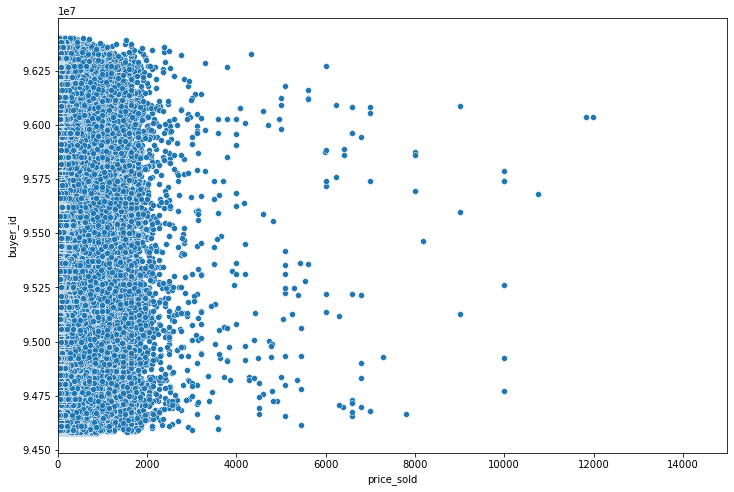

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=hist_data, x='price_sold', y='buyer_id')
plt.xlim(0, 15000)

In [12]:
hist_data = hist_data[hist_data.price_sold<12000]

(0.0, 77.0)

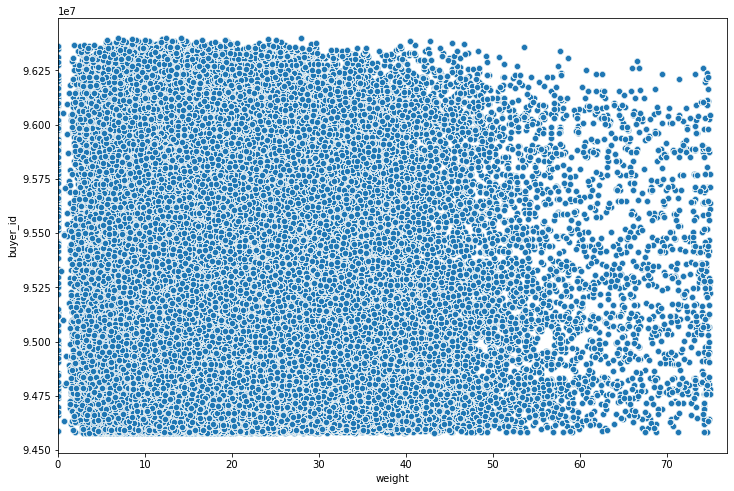

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=hist_data, x='weight', y='buyer_id')
plt.xlim(0, 77)

In [14]:
hist_data = hist_data[hist_data.weight<77]

In [17]:
hist_data[hist_data.pav_order_id<58521253887][:3]

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods,weight,created_month,created_day,created_dayofweek,created_hour,created_minute,created_weekends
596,95665226,4620121471,2021-07-01 02:04:55,204316597,1.0,43.9,0,42.8,7,1,3,2,4,0
597,95665226,4620121471,2021-07-01 02:04:55,202997873,2.0,18.5,0,42.8,7,1,3,2,4,0
598,95665226,4620121471,2021-07-01 02:04:55,203514251,1.0,120.0,0,42.8,7,1,3,2,4,0


In [27]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529551 entries, 0 to 4529888
Data columns (total 14 columns):
 #   Column             Dtype         
---  ------             -----         
 0   buyer_id           int64         
 1   pav_order_id       int64         
 2   created            datetime64[ns]
 3   item_id            int64         
 4   count              float64       
 5   price_sold         float64       
 6   flag_weight_goods  int32         
 7   weight             float64       
 8   created_month      int64         
 9   created_day        int64         
 10  created_dayofweek  int64         
 11  created_hour       int64         
 12  created_minute     int64         
 13  created_weekends   int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(9)
memory usage: 501.1 MB


In [28]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
hist_data.describe()

,buyer_id,pav_order_id,item_id,count,price_sold,flag_weight_goods,weight,created_month,created_day,created_dayofweek,created_hour,created_minute,created_weekends
count,4529551.0,4529551.0,4529551.0,4529551.0,4529551.0,4529551.0,4529551.0,4529551.0,4529551.0,4529551.0,4529551.0,4529551.0,4529551.0
mean,95260147.0,95518420562.8,203651449.3,1.5,103.9,0.2,18.1,7.5,15.3,3.1,13.0,29.5,0.3
std,472954.0,16478827893.9,1624361.9,1.5,115.3,0.4,10.7,0.5,8.9,2.0,4.4,17.3,0.5
min,94578442.0,4620121471.0,202782406.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0
25%,94839609.0,98509589851.0,202838754.0,1.0,44.7,0.0,10.7,7.0,7.0,1.0,10.0,14.0,0.0
50%,95168620.0,98512719926.0,203367252.0,1.0,70.0,0.0,15.7,7.0,15.0,3.0,13.0,29.0,0.0
75%,95623481.0,98515778757.0,203566436.0,1.5,121.4,0.0,22.7,8.0,23.0,5.0,16.0,44.0,1.0
max,96400990.0,98521253887.0,218240709.0,600.0,11999.0,1.0,75.0,9.0,31.0,6.0,23.0,59.0,1.0


In [29]:
df_corr = hist_data.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr.drop(df_corr.iloc[1::2].index, inplace=True)
df_corr_nd = df_corr.drop(df_corr[df_corr['Correlation Coefficient'] == 1.0].index)

In [30]:
corr = df_corr_nd['Correlation Coefficient'] > 0.1
df_corr_nd[corr][0:50]

,Feature 1,Feature 2,Correlation Coefficient
14,created_dayofweek,created_weekends,0.8
16,item_id,flag_weight_goods,0.2
18,created_day,created_month,0.1
20,weight,count,0.1
22,buyer_id,pav_order_id,0.1


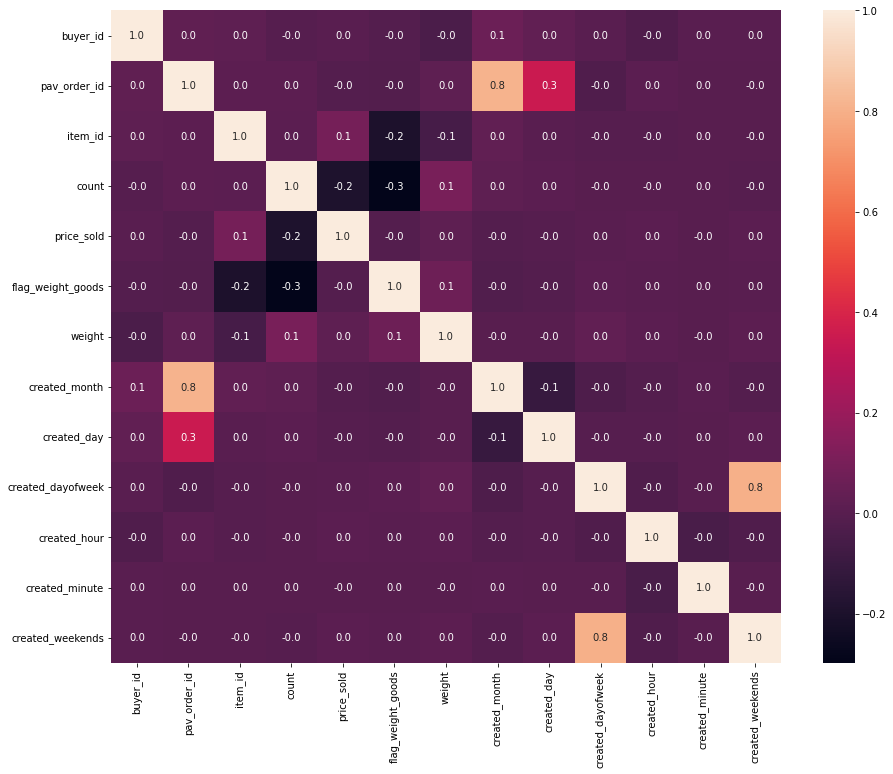

In [31]:
plt.figure(figsize=(15, 12))

sns.heatmap(hist_data.corr(method='spearman'), annot=True, fmt=".1f");

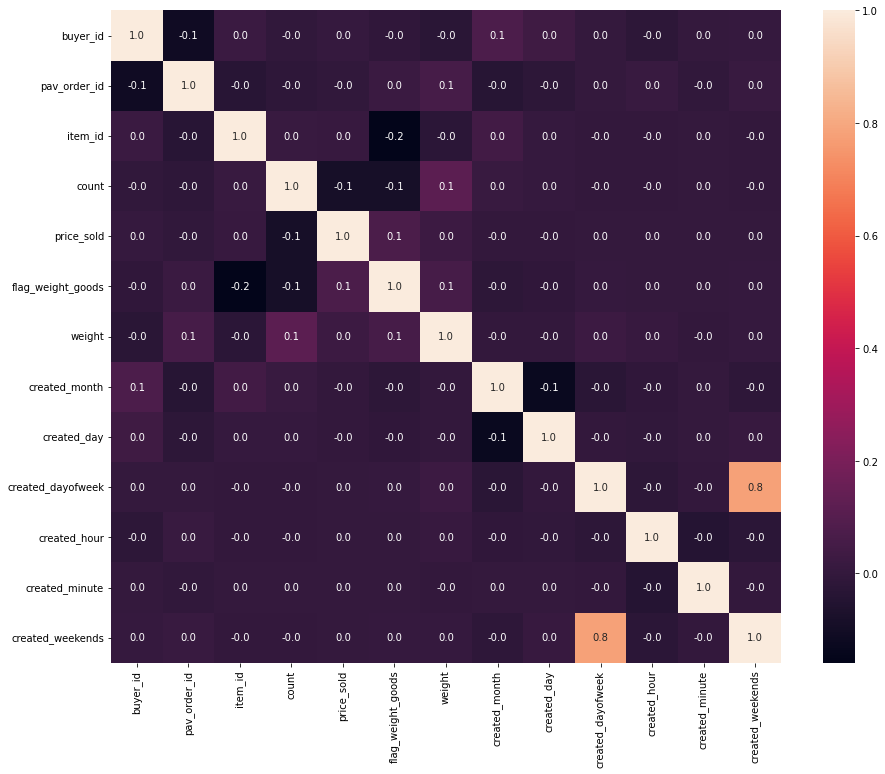

In [32]:
plt.figure(figsize=(15, 12))

sns.heatmap(hist_data.corr(), annot=True, fmt=".1f");

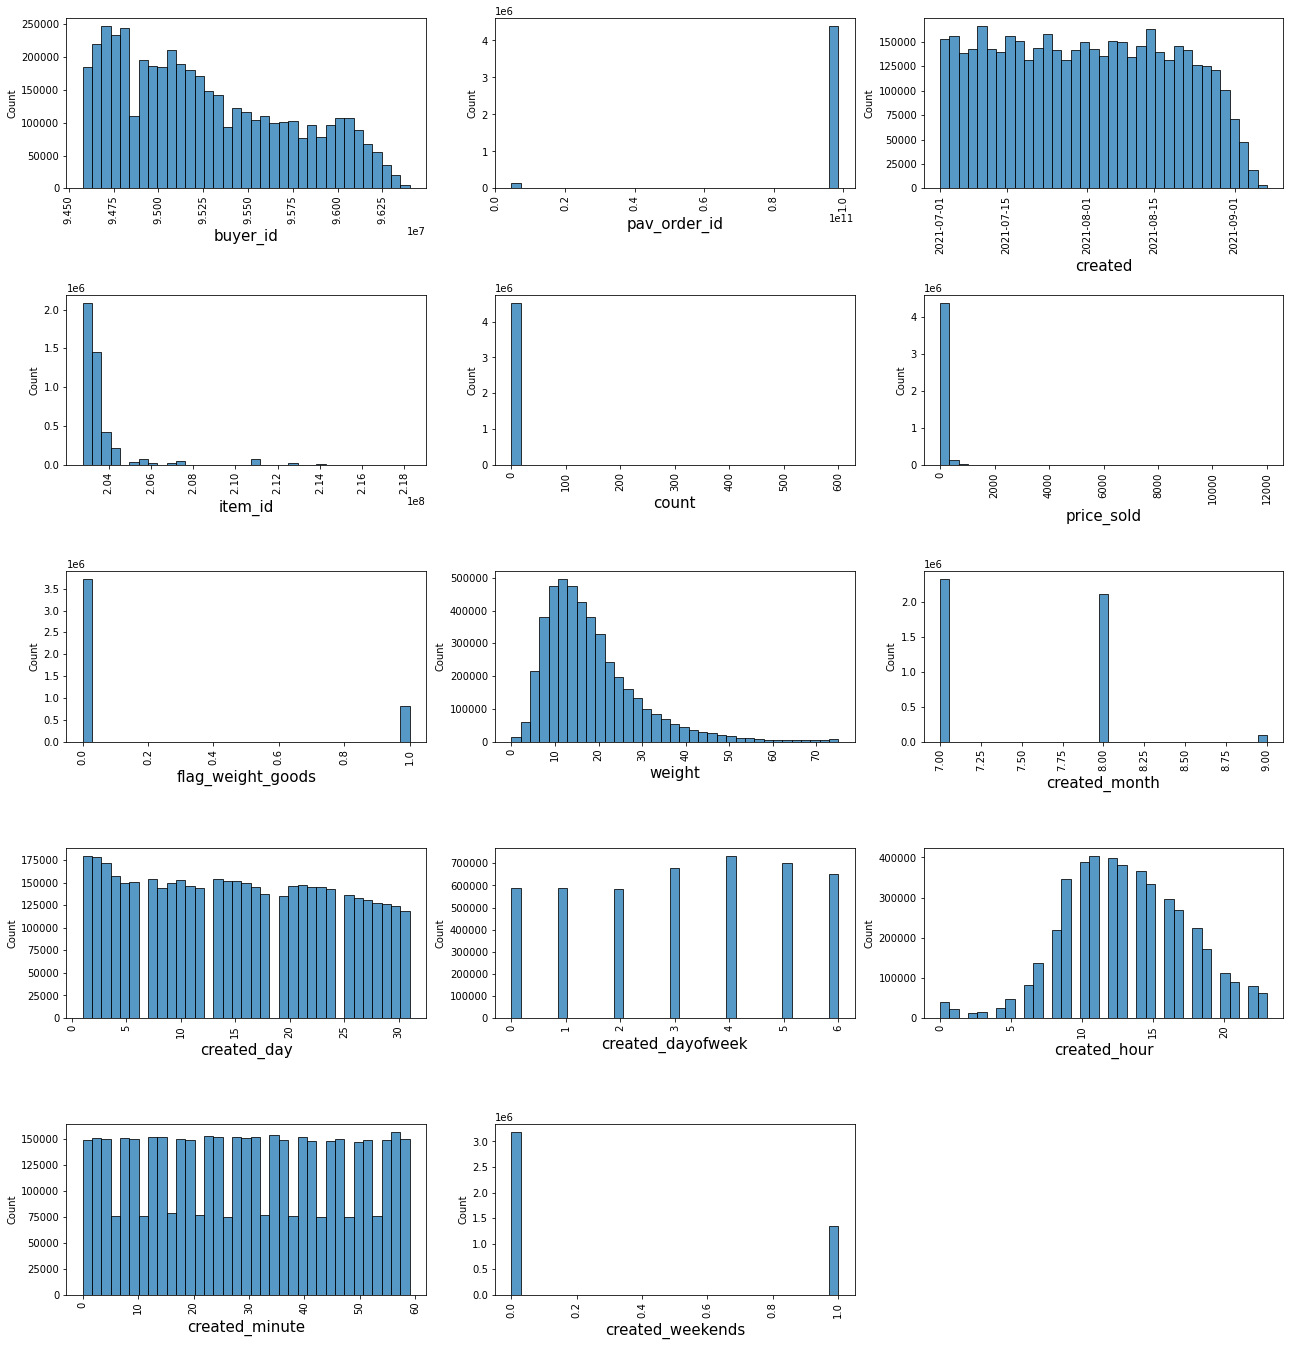

In [33]:
fig = plt.figure(figsize=(18,22))

for index,feature in enumerate(hist_data):
    plt.subplot(6,3,index+1)
    sns.histplot(x=feature, data=hist_data, bins=35)
    
    plt.xlabel('{}'.format(feature), size=15, labelpad=5) 
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    plt.xticks(rotation=90)
    
fig.tight_layout(pad=1.0)

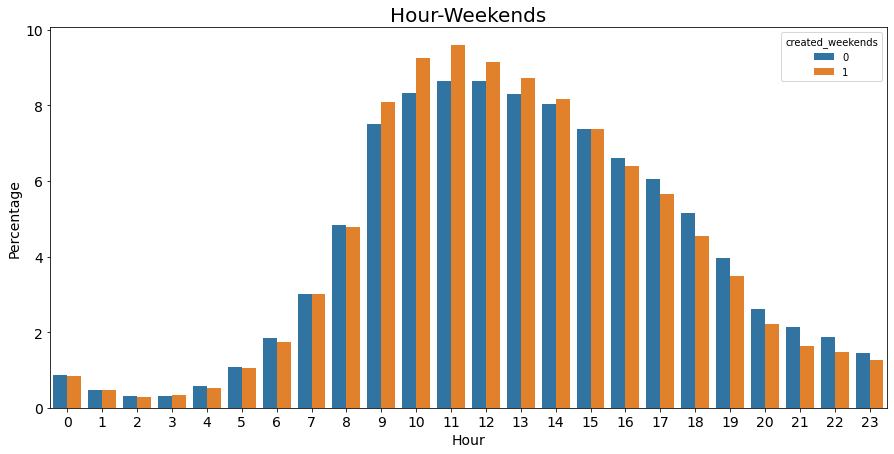

In [34]:
norm_hours = (hist_data.groupby(['created_weekends'])['created_hour']
              .value_counts(normalize=True)
              .rename('percentage')
              .mul(100)
              .reset_index()
              .sort_values('created_hour'))

plt.figure(figsize=(15, 7))
ax = sns.barplot(x="created_hour", y="percentage", hue="created_weekends", data=norm_hours)

plt.title('Hour-Weekends', fontsize=20)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Hour', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

# 0 будни
# 1 выходные

In [35]:
# соберем словарь встречаемостей - какие item_id покупались чаще с 
# каждым item_id 
tmp = (
    hist_data[['item_id', 'pav_order_id']]
    .sort_values(['item_id', 'pav_order_id'])
    .merge(hist_data[['item_id', 'pav_order_id']], how='left', on=['pav_order_id'], suffixes=('', '_left'))
)

In [36]:
tmp

,item_id,pav_order_id,item_id_left
0,202782406,4620130654,203426415
1,202782406,4620130654,203042853
2,202782406,4620130654,209128223
3,202782406,4620130654,204012148
4,202782406,4620130654,202795806
...,...,...,...
106065744,218240709,98518623098,217983495
106065745,218240709,98518623098,203443527
106065746,218240709,98518623098,202804467
106065747,218240709,98518623098,202883977


In [37]:
tmp = tmp[tmp['item_id'] != tmp['item_id_left']].copy()

In [38]:
tmp

,item_id,pav_order_id,item_id_left
0,202782406,4620130654,203426415
1,202782406,4620130654,203042853
2,202782406,4620130654,209128223
3,202782406,4620130654,204012148
4,202782406,4620130654,202795806
...,...,...,...
106065744,218240709,98518623098,217983495
106065745,218240709,98518623098,203443527
106065746,218240709,98518623098,202804467
106065747,218240709,98518623098,202883977


In [39]:
tmp1 = tmp.groupby(['item_id'])['item_id_left'].agg(lambda x: Counter(x).most_common(3))

In [40]:
tmp1

item_id
202782406    [(202820148, 17), (202872237, 13), (202818687,...
202782407     [(204020815, 1), (204011988, 1), (202793061, 1)]
202782412     [(203451499, 2), (204039463, 2), (202820148, 2)]
202782414     [(203579617, 3), (202872237, 2), (203118216, 2)]
202782415     [(202820148, 4), (204002978, 4), (204126838, 4)]
                                   ...                        
218175579     [(202991732, 1), (202806882, 1), (202820398, 1)]
218199321     [(204069817, 1), (202796173, 1), (210896763, 1)]
218217955     [(217881419, 1), (210896763, 1), (204350492, 1)]
218217991     [(203566372, 1), (202819015, 1), (202844455, 1)]
218240709     [(202904092, 1), (203084145, 1), (202818748, 1)]
Name: item_id_left, Length: 52458, dtype: object

In [41]:
most_freq_dict = {k: v for (k, v) in tmp1.iteritems()}

In [42]:
most_freq_dict

{202782406: [(202820148, 17), (202872237, 13), (202818687, 11)],
 202782407: [(204020815, 1), (204011988, 1), (202793061, 1)],
 202782412: [(203451499, 2), (204039463, 2), (202820148, 2)],
 202782414: [(203579617, 3), (202872237, 2), (203118216, 2)],
 202782415: [(202820148, 4), (204002978, 4), (204126838, 4)],
 202782417: [(202883917, 1), (203458919, 1), (203408386, 1)],
 202782418: [(202820148, 19), (202872237, 11), (203207012, 8)],
 202782419: [(203055146, 1), (204122554, 1), (203451443, 1)],
 202782420: [(203024953, 1), (203172337, 1), (213875271, 1)],
 202782425: [(202872237, 4), (202806955, 3), (204103716, 3)],
 202782426: [(202872237, 4), (202820148, 4), (202806959, 3)],
 202782427: [(202809627, 1), (203520262, 1), (203450521, 1)],
 202782432: [(202820148, 28), (203068900, 10), (202854572, 9)],
 202782433: [(202820148, 2), (203422957, 2), (202791620, 2)],
 202782434: [(202791060, 2), (202808255, 1), (204072004, 1)],
 202782436: [(202820148, 42), (202872237, 16), (202953901, 15)]

In [43]:
del tmp1, tmp
gc.collect()

43750

In [44]:
test = pd.read_csv('test.csv')

In [45]:
test

,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods
0,94640077,98519243164,2021-08-30 17:56:31,203053459,1.0,67.6,False
1,95865222,98512083628,2021-07-26 16:17:21,202967705,1.1,406.8,True
2,95147155,98519972197,2021-09-02 21:54:18,203551512,1.0,52.8,False
3,94832207,98518646272,2021-08-28 10:43:23,202801712,1.0,92.9,False
4,95483101,98510857920,2021-07-20 14:27:08,203416702,2.0,239.0,False
...,...,...,...,...,...,...,...
1081415,95178159,98519703380,2021-09-01 19:10:29,203240557,1.0,70.0,False
1081416,95597512,98519797071,2021-09-02 10:29:11,202806932,1.0,45.0,False
1081417,95553515,98520350679,2021-09-04 11:33:18,205755780,3.0,44.9,False
1081418,95688424,98509396234,2021-07-13 14:41:37,203423005,1.0,46.7,False


In [46]:
test['created'] = pd.to_datetime(test['created'])

test['created_month'] = test['created'].apply(lambda x: x.month)
test['created_day'] = test['created'].apply(lambda x: x.day)
test['created_dayofweek'] = test['created'].apply(lambda x: x.dayofweek)
test['created_hour'] = test['created'].apply(lambda x: x.hour)
test['created_minute'] = test['created'].apply(lambda x: x.minute)
test['created_weekends'] = test['created_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

test['flag_weight_goods'] = 1 * (test.flag_weight_goods.values == True)

In [30]:
test.transpose()

,0,1,2,3,4,5,6,7,8,9,...,1081410,1081411,1081412,1081413,1081414,1081415,1081416,1081417,1081418,1081419
buyer_id,94640077,95865222,95147155,94832207,95483101,94998501,95923249,94677056,95028586,95582965,...,94805849,94638797,96377103,95228263,95855698,95178159,95597512,95553515,95688424,96135931
pav_order_id,98519243164,98512083628,98519972197,98518646272,98510857920,98518461389,98518468118,98519863180,98517516871,98519044118,...,4620207596,98518677443,98520325216,98519811079,98519622974,98519703380,98519797071,98520350679,98509396234,98513272242
created,2021-08-30 17:56:31,2021-07-26 16:17:21,2021-09-02 21:54:18,2021-08-28 10:43:23,2021-07-20 14:27:08,2021-08-27 13:21:32,2021-08-27 13:46:44,2021-09-02 14:16:26,2021-08-23 11:26:51,2021-08-29 19:46:21,...,2021-08-29 13:48:21,2021-08-28 12:26:33,2021-09-04 10:25:30,2021-09-02 11:20:25,2021-09-01 13:53:46,2021-09-01 19:10:29,2021-09-02 10:29:11,2021-09-04 11:33:18,2021-07-13 14:41:37,2021-08-02 06:41:34
item_id,203053459,202967705,203551512,202801712,203416702,203203399,203441370,203382453,203423395,207307043,...,204114050,204082807,203171014,203550017,203566539,203240557,202806932,205755780,203423005,202808313
count,1.0,1.14,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0
price_sold,67.62,406.8,52.77,92.89,238.99,133.99,54.71,33.46,110.99,89.99,...,34.69,249.0,121.99,181.99,199.99,69.99,44.99,44.89,46.74,80.1
flag_weight_goods,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
created_month,8,7,9,8,7,8,8,9,8,8,...,8,8,9,9,9,9,9,9,7,8
created_day,30,26,2,28,20,27,27,2,23,29,...,29,28,4,2,1,1,2,4,13,2
created_dayofweek,0,0,3,5,1,4,4,3,0,6,...,6,5,5,3,2,2,3,5,1,0


(0.0, 15000.0)

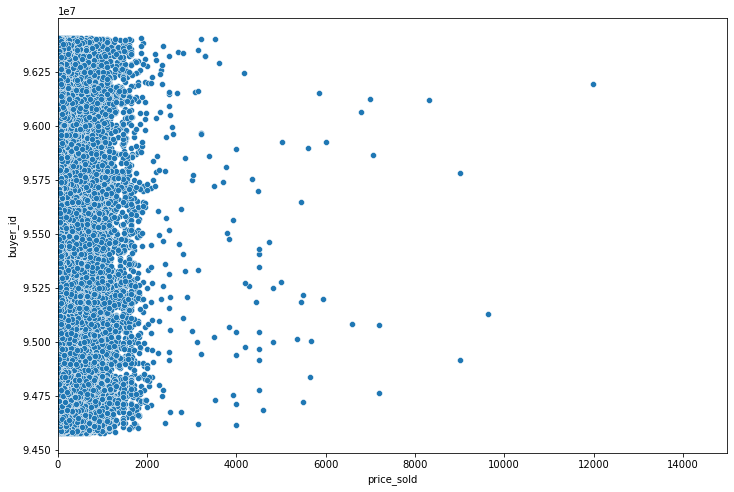

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=test, x='price_sold', y='buyer_id')
plt.xlim(0, 15000)

In [48]:
test = test[test.price_sold<15000]

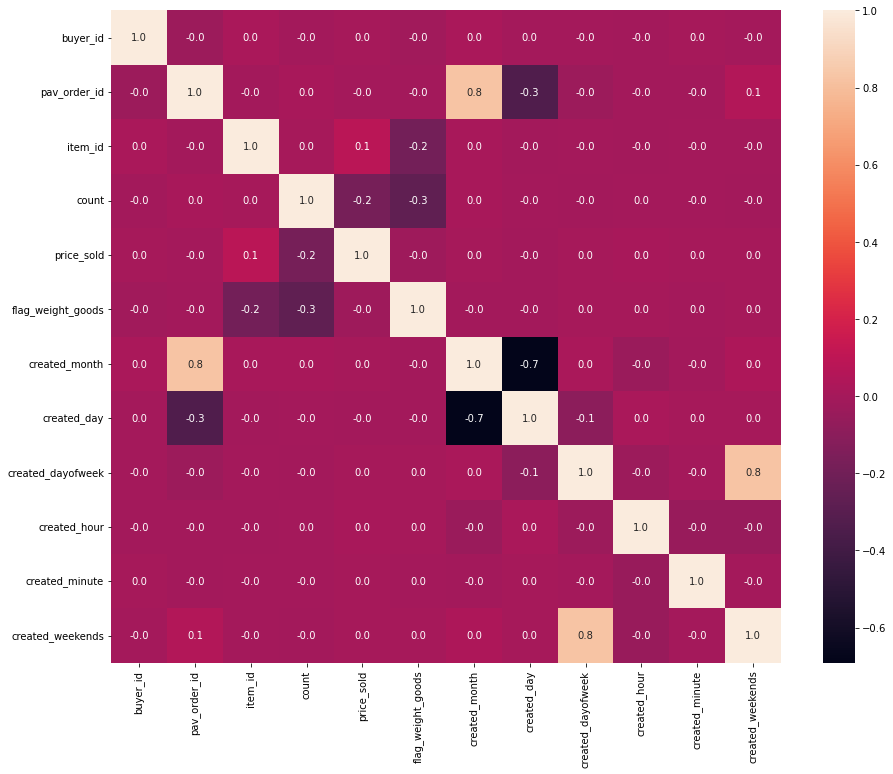

In [49]:
plt.figure(figsize=(15, 12))

sns.heatmap(test.corr(method='spearman'), annot=True, fmt=".1f");

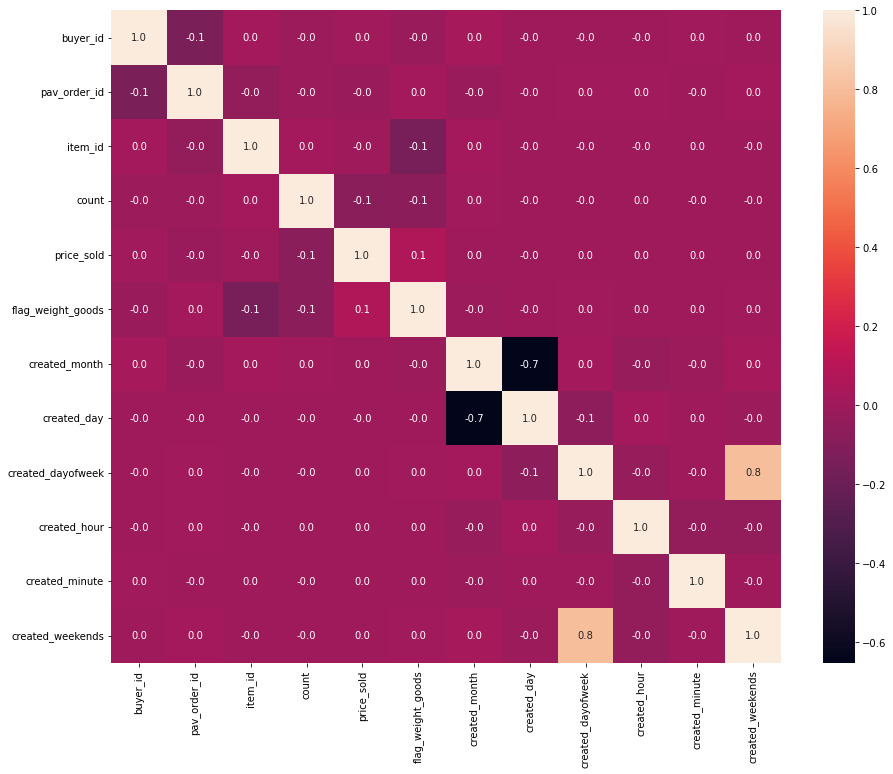

In [50]:
plt.figure(figsize=(15, 12))

sns.heatmap(test.corr(), annot=True, fmt=".1f");

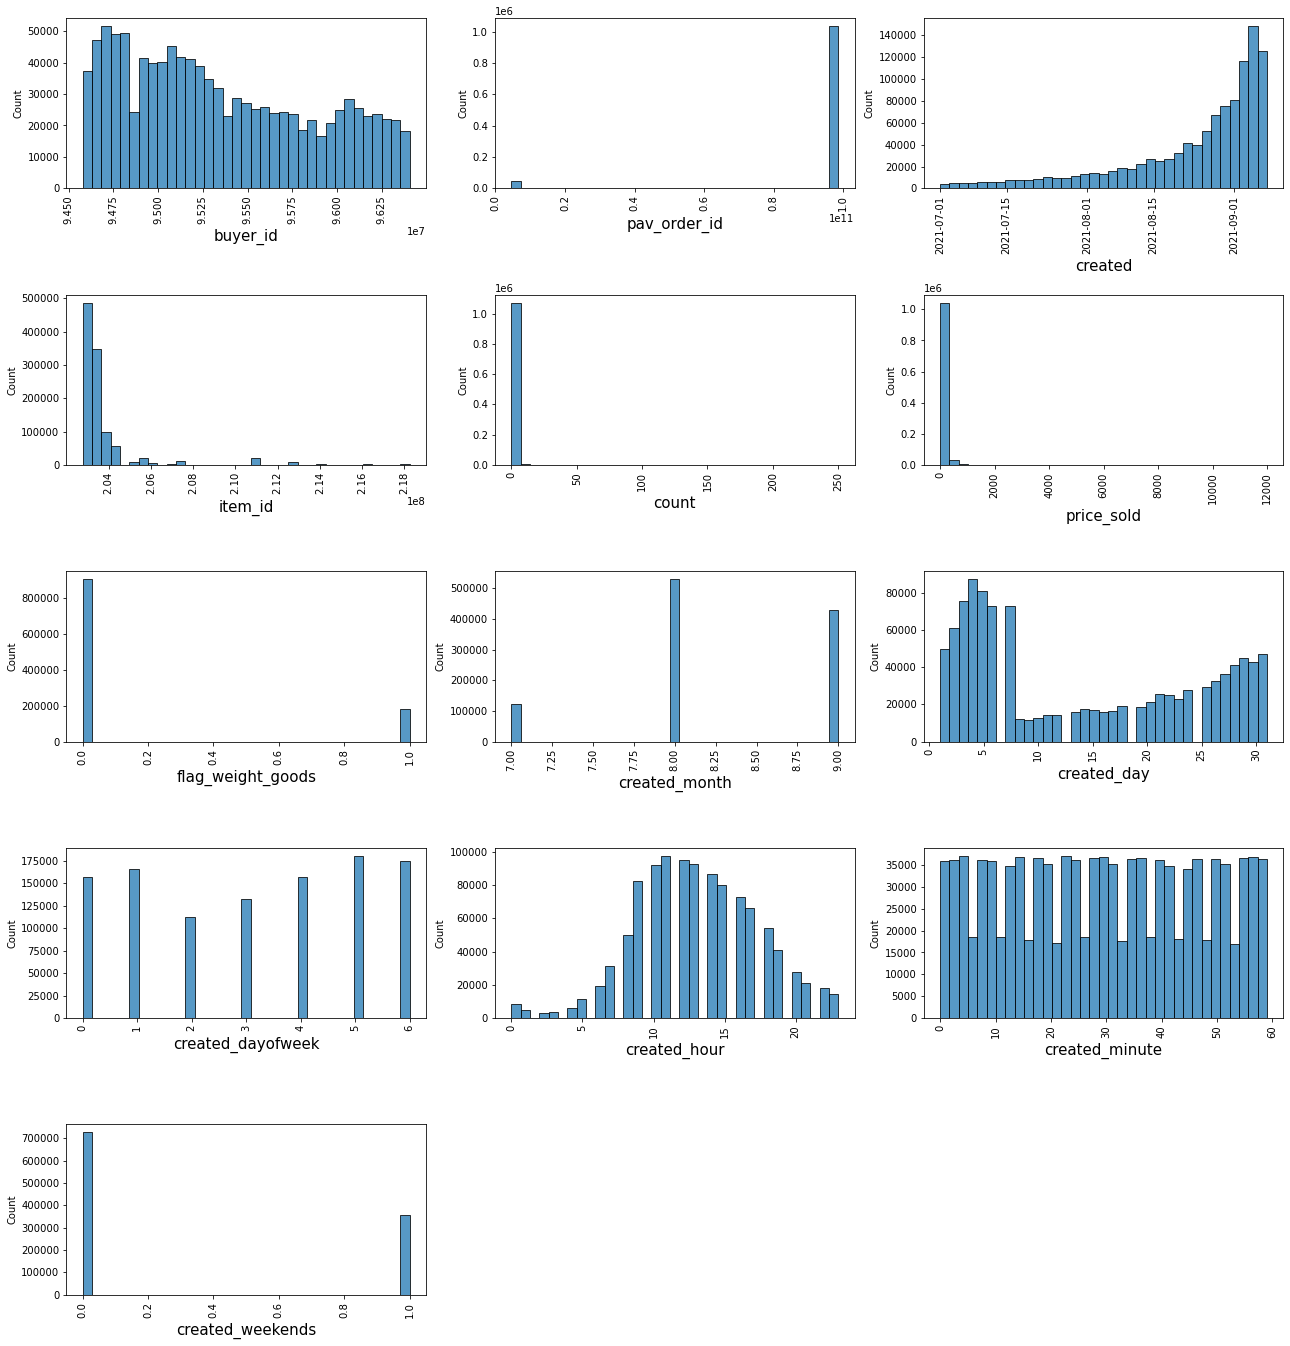

In [51]:
fig = plt.figure(figsize=(18,22))

for index,feature in enumerate(test):
    plt.subplot(6,3,index+1)
    sns.histplot(x=feature, data=test, bins=35)
    
    plt.xlabel('{}'.format(feature), size=15, labelpad=5) 
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    plt.xticks(rotation=90)
    
fig.tight_layout(pad=1.0)

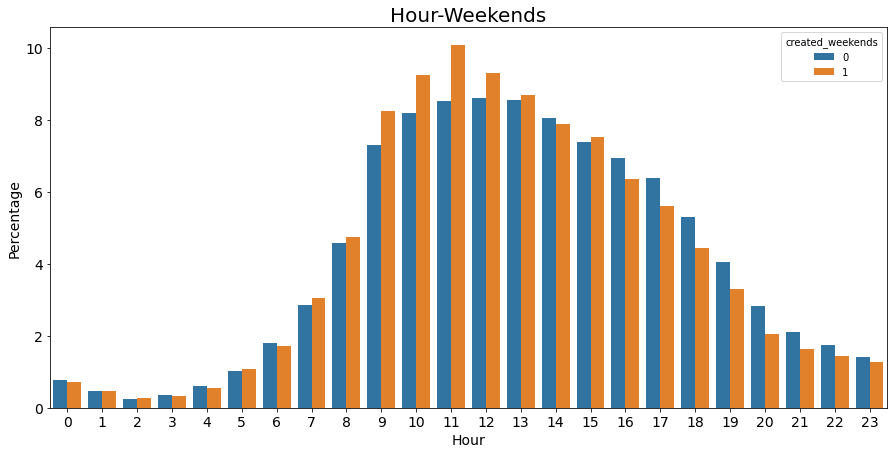

In [52]:
norm_hours = (test.groupby(['created_weekends'])['created_hour']
              .value_counts(normalize=True)
              .rename('percentage')
              .mul(100)
              .reset_index()
              .sort_values('created_hour'))

plt.figure(figsize=(15, 7))
ax = sns.barplot(x="created_hour", y="percentage", hue="created_weekends", data=norm_hours)

plt.title('Hour-Weekends', fontsize=20)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Hour', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

# 0 будни
# 1 выходные

In [53]:
pred = test.groupby(['pav_order_id'])['item_id'].agg([('basket', list)])

In [54]:
pred

,basket
pav_order_id,
4620121489,"[203164283, 204043498, 204146308, 204119602, 2..."
4620121505,"[202819114, 204074914, 202822471, 202880254, 2..."
4620121594,"[202818687, 203430473, 204016498, 203017711, 2..."
4620121684,"[203338264, 203436378, 203433668, 202812161, 2..."
4620121902,"[205768202, 202811971, 203429467, 204393593, 2..."
...,...
98521278256,"[203428006, 202856200, 203406593, 203390294, 2..."
98521278378,"[202966002, 204090577, 203403030, 204113387, 2..."
98521278699,"[202808263, 203473696, 203476300, 203497376, 2..."


In [55]:
# из списка кандидатов по совстречаемости удаляем повторяющиеся item_id, 
# сохраняя порядок
def get_unique_recs(recs: list, top_n: int) -> list:
    rec_dict = {}
    counter = 0
    for k, v in recs:
        if k not in rec_dict:
            rec_dict[k] = v
            counter += 1
        if counter == top_n:
            break
    return list(rec_dict.keys())

In [56]:
def rec_by_item(item_id: int, most_freq_dict: dict) -> list:
    
    return most_freq_dict.get(item_id, None)

In [57]:
# для каждого item_id соберем top_n самых часто встречающихся item_id, 
# отсортируем по частоте и выберем уникальные
def rec_by_basket(basket: list, most_freq_dict: dict, top_n: int = 20) -> list:
    
    res = []
    for item in basket:
        recs = rec_by_item(item, most_freq_dict)
        if recs is not None:
            res += recs
    
    res = sorted(res, key=lambda x: x[1], reverse=True)
    
    return get_unique_recs(res, top_n)

In [58]:
pred['preds'] = pred['basket'].map(lambda x: rec_by_basket(x, most_freq_dict=most_freq_dict))

In [60]:
hist_data.item_id.value_counts()[:20]

# 20 популярных товаров

202820148    65837
202872237    41657
202809628    27241
202838754    17860
202862432    17640
203059303    17376
203404725    17097
202854572    16186
202818687    16030
202791192    15284
202864758    15183
203068900    15107
202807362    13493
202953901    13207
202843988    13127
212519969    12796
202880262    12556
202791620    12468
202820144    12234
203370019    11769
Name: item_id, dtype: int64

In [61]:
pred

,basket,preds
pav_order_id,,
4620121489,"[203164283, 204043498, 204146308, 204119602, 2...","[202820148, 202872237, 202791620, 203566491, 2..."
4620121505,"[202819114, 204074914, 202822471, 202880254, 2...","[202820148, 202872237, 202880262, 203068900, 2..."
4620121594,"[202818687, 203430473, 204016498, 203017711, 2...","[202820148, 202872237, 203059303, 202809628, 2..."
4620121684,"[203338264, 203436378, 203433668, 202812161, 2...","[202820148, 202872237, 203090014, 202791620, 2..."
4620121902,"[205768202, 202811971, 203429467, 204393593, 2...","[202820148, 203422957, 203431923, 202872237, 2..."
...,...,...
98521278256,"[203428006, 202856200, 203406593, 203390294, 2...","[202820148, 202791192, 202872237, 212519969, 2..."
98521278378,"[202966002, 204090577, 203403030, 204113387, 2...","[202820148, 202872237, 202809628, 203108045, 2..."
98521278699,"[202808263, 203473696, 203476300, 203497376, 2...","[202820148, 202872237, 202809628, 203529288, 2..."


In [62]:
pred['preds'].str.len()

# не хватает рекомендаций

pav_order_id
4620121489     20
4620121505     11
4620121594     11
4620121684     14
4620121902     13
               ..
98521278256    20
98521278378    16
98521278699    13
98521278890    18
98521278926    13
Name: preds, Length: 80244, dtype: int64

In [63]:
pred['preds'].to_csv('pred.csv')

In [64]:
hist_data.to_csv('hist_data_2.csv')

In [65]:
# Пример использования подхода из бейзлайна для тестирования модели и 
# расчета метрики через деление hist_data на трейн и валидацию

import gc
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

In [66]:
def split_data(data, test_size=0.3):
    orders_sort = data[['pav_order_id', 'created']].drop_duplicates().sort_values(by=['created', 'pav_order_id'])
    train_orders, test_orders = train_test_split(orders_sort['pav_order_id'].tolist(), test_size=test_size, shuffle=True)
    train_orders, test_orders = set(train_orders), set(test_orders)
    train = data[data['pav_order_id'].apply(lambda x: x in train_orders)]
    test = data[data['pav_order_id'].apply(lambda x: x in test_orders)]
    return train, test, orders_sort, train_orders, test_orders

In [67]:
# из списка кандидатов по совстречаемости удаляем повторяющиеся item_id, сохраняя порядок
def get_unique_recs(recs: list, top_n: int) -> list:
    rec_dict = {}
    counter = 0
    for k, v in recs:
        if k not in rec_dict:
            rec_dict[k] = v
            counter += 1
        if counter == top_n:
            break
    return list(rec_dict.keys())

In [68]:
def rec_by_item(item_id: int, most_freq_dict: dict) -> list:
    
    return most_freq_dict.get(item_id, None)

In [69]:
# для каждого item_id соберем top_n самых часто встречающихся item_id, отсортируем по частоте и выберем уникальные
def rec_by_basket(basket: list, most_freq_dict: dict, top_n: int = 20) -> list:
    
    res = []
    for item in basket:
        recs = rec_by_item(item, most_freq_dict)
        if recs is not None:
            res += recs
    
    res = sorted(res, key=lambda x: x[1], reverse=True)
    
    return get_unique_recs(res, top_n)

In [70]:
# метрики оцениваются для вектора релевантности. пример:
# реальные item_id, которые приобрел покупатель: [1 ,4, 5, 69]
# рекомендованные алгоритмом item_id: [4, 6, 7, 8, 1, 2, 67, 90]
# тогда вектор релеватности будет выглядеть следующим образом: [1, 0, 0, 0, 1, 0, 0, 0]
# и уже по не му будет расчитываться ndcg
def dcg(
    y_relevance: np.ndarray
) -> float:
    return np.sum([(2**i - 1) / np.log2(k + 1) for (k, i) in enumerate(y_relevance, start=1)])


In [71]:
def ndcg(
    y_relevance: np.ndarray,
    k: int
) -> float:
    if y_relevance.sum() == 0:
        return 0.0
    DCG = dcg(y_relevance[:k])
    IDCG = dcg(-np.sort(-y_relevance)[:k])
    return DCG / IDCG

In [72]:
def apply_relevance(x):
    return [int(item in x['basket']) for item in x['preds']]

In [73]:
def create_relevance(pred):
    d = pred.copy()
    d['basket'] = d['basket'].apply(set)
    d = d.apply(apply_relevance, axis=1)
    return d

In [74]:
def ndcg_full_dataset(d):
    dd = pd.DataFrame(d.to_list()).fillna(0).to_numpy()
    k = dd.shape[1]
    scores = [ndcg(dd[i], k) for i in range(len(dd))]
    return np.mean(scores)

In [75]:
def compute_ndcg_score(pred):
    relevance = create_relevance(pred)
    return ndcg_full_dataset(relevance)

In [76]:
def make_coocurs_dict(train_data):
    tmp = (
        train_data[['item_id', 'pav_order_id']]
        .sort_values(['item_id', 'pav_order_id'])
        .merge(train_data[['item_id', 'pav_order_id']], how='left', on=['pav_order_id'], suffixes=('', '_left'))
    )
    tmp = tmp[tmp['item_id'] != tmp['item_id_left']].copy()
    tmp1 = tmp.groupby(['item_id'])['item_id_left'].agg(lambda x: Counter(x).most_common(3))

    most_freq_dict = {k: v for (k, v) in tmp1.iteritems()}

    del tmp1, tmp
    gc.collect()
    return most_freq_dict

In [77]:
def create_basket(test_data):
    pred = test_data.groupby(['pav_order_id'])['item_id'].agg([('basket', list)])
    return pred

In [78]:
def make_predictions(test_data, most_freq_dict):
    pred = create_basket(test_data)
    pred['preds'] = pred['basket'].map(lambda x: rec_by_basket(x, most_freq_dict=most_freq_dict))
    return pred

In [79]:
# считываем исторические данные
data = pd.read_csv("hist_data_2.csv", parse_dates=['created'])

In [80]:
data

,Unnamed: 0,buyer_id,pav_order_id,created,item_id,count,price_sold,flag_weight_goods,weight,created_month,created_day,created_dayofweek,created_hour,created_minute,created_weekends
0,0,95203091,98506637863,2021-07-01 00:03:44,202808329,1.0,80.0,0,11.1,7,1,3,0,3,0
1,1,95203091,98506637863,2021-07-01 00:03:44,202953905,1.1,44.9,1,11.1,7,1,3,0,3,0
2,2,95203091,98506637863,2021-07-01 00:03:44,203566452,1.0,70.0,0,11.1,7,1,3,0,3,0
3,3,95203091,98506637863,2021-07-01 00:03:44,202820143,2.0,41.3,1,11.1,7,1,3,0,3,0
4,4,95203091,98506637863,2021-07-01 00:03:44,204400422,1.0,270.0,0,11.1,7,1,3,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529546,4529884,95619205,4620221347,2021-09-07 18:48:29,204351817,1.0,100.0,0,9.8,9,7,1,18,48,0
4529547,4529885,95619205,4620221347,2021-09-07 18:48:29,203523604,1.0,62.2,0,9.8,9,7,1,18,48,0
4529548,4529886,95619205,4620221347,2021-09-07 18:48:29,203566357,2.0,39.9,0,9.8,9,7,1,18,48,0
4529549,4529887,95619205,4620221347,2021-09-07 18:48:29,203566418,1.0,62.2,0,9.8,9,7,1,18,48,0


In [81]:
# разобьем историю в отношении 70 на 30 для трейна и валидации
train_data, test_data, orders_sort, train_orders, test_orders = split_data(data)

In [82]:
# соберем словарь встречаемостей - какие item_id покупались чаще с каждым item_id 
most_freq_dict = make_coocurs_dict(train_data)

In [83]:
most_freq_dict

{202782406: [(202820148, 13), (202872237, 7), (202809628, 7)],
 202782407: [(204020815, 1), (204011988, 1), (202793061, 1)],
 202782412: [(202820148, 2), (203429959, 1), (203035035, 1)],
 202782414: [(202872237, 2), (203118216, 2), (204141065, 2)],
 202782415: [(202820148, 3), (204126838, 3), (202862432, 2)],
 202782417: [(202883917, 1), (203458919, 1), (203408386, 1)],
 202782418: [(202820148, 11), (202872237, 6), (202953901, 5)],
 202782420: [(203024953, 1), (203172337, 1), (213875271, 1)],
 202782425: [(202818687, 3), (203068900, 3), (202872237, 3)],
 202782426: [(202872237, 3), (202806959, 3), (203566371, 2)],
 202782432: [(202820148, 16), (203068900, 7), (202880254, 6)],
 202782433: [(203422957, 2), (202791620, 2), (202809628, 2)],
 202782434: [(202791060, 2), (202808255, 1), (204072004, 1)],
 202782436: [(202820148, 29), (202809628, 12), (202872237, 11)],
 202782439: [(202807440, 1), (202806898, 1), (207588843, 1)],
 202782440: [(202800118, 4), (202820148, 3), (202820144, 3)],
 2

In [84]:
# предсказываем
pred = make_predictions(test_data, most_freq_dict)

In [85]:
pred

,basket,preds
pav_order_id,,
4620121471,"[204316597, 202997873, 203514251, 203554053, 2...","[202872237, 202820148, 202809628, 203068900, 2..."
4620121484,"[204115834, 202953719, 203450198, 203443525, 2...","[202820148, 202806996, 202806997, 202931883, 2..."
4620121490,"[203431398, 202819015, 204151139, 204021173, 2...","[202820148, 202872237, 202809628, 202791620, 2..."
4620121542,"[204032418, 203206682, 204127022, 202807000, 2...","[202820148, 202807289, 202872237, 203403554, 2..."
4620121611,"[203405339, 204083545, 203579488, 203469410, 2...","[202820148, 202872237, 202809628, 203566372, 2..."
...,...,...
98521160325,"[203884509, 203426631, 202807124, 203506357, 2...","[202872237, 202809628, 202838754, 202820148, 2..."
98521161421,"[203043384, 204334532, 202793061, 202807167, 2...","[202820148, 202872237, 212519969, 203096881, 2..."
98521164520,"[203360912, 205717631, 203409130, 202803617, 2...","[202820148, 202838754, 202872237, 202880262, 2..."


In [86]:
pred.to_csv("preds_on_splitted_hist_data.csv")

In [87]:
# посчитаем скор для всего набора предсказаний
d_score = compute_ndcg_score(pred)
print(d_score)

0.44008343073134537
